In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

movies = pd.read_csv("ml-latest-small/movies.csv")
movies_rating = pd.read_csv("ml-latest-small/ratings.csv")

In [3]:
movies["genres"].str.get_dummies('|')

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
sum_movies_genres = movies["genres"].str.get_dummies('|').sum()
sum_movies_genres

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

In [9]:
sum_movies_genres.sort_values(ascending=False)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

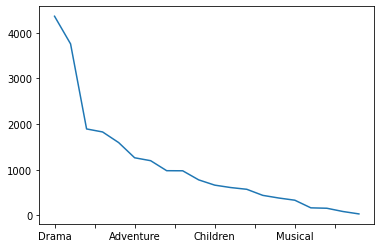

In [10]:
sum_movies_genres.sort_values(ascending=False).plot()

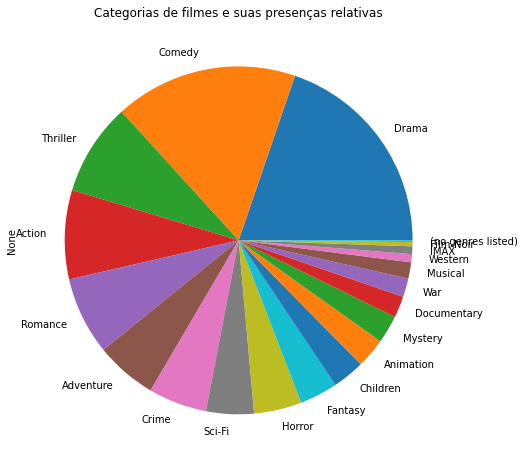

In [11]:
sum_movies_genres.sort_values(ascending=False).plot(
    kind='pie', 
    title='Categorias de filmes e suas presenças relativas',
    figsize=(8,8))
plt.show()

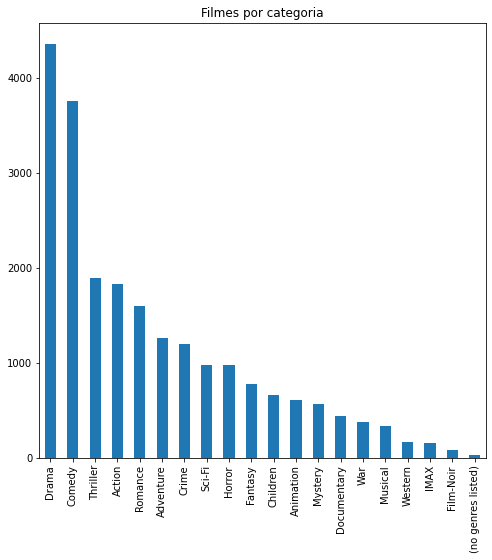

In [12]:
sum_movies_genres.sort_values(ascending=False).plot(
    kind='bar', 
    title='Filmes por categoria',
    figsize=(8,8))
plt.show()

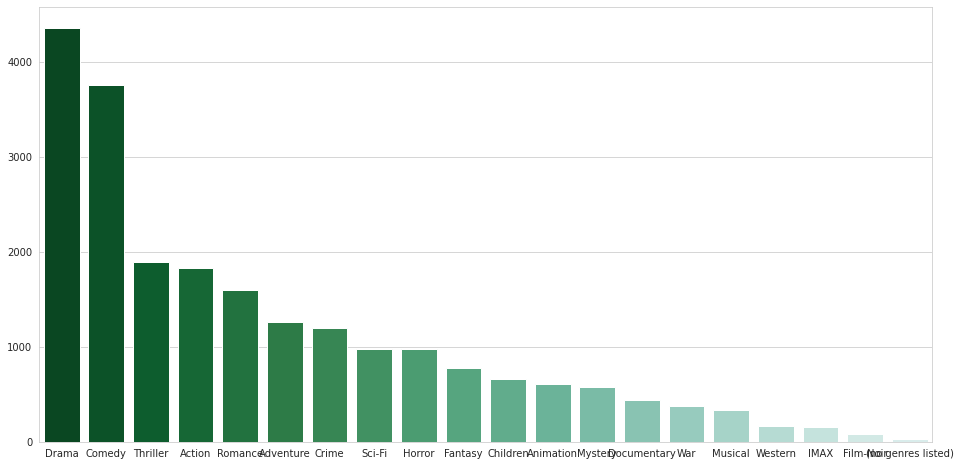

In [14]:
sns.set_style("whitegrid")

movies_by_genre = sum_movies_genres.sort_values(ascending=False)
plt.figure(figsize=(16,8))
sns.barplot(x=movies_by_genre.index,
            y=movies_by_genre.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(movies_by_genre) + 4))
plt.show()

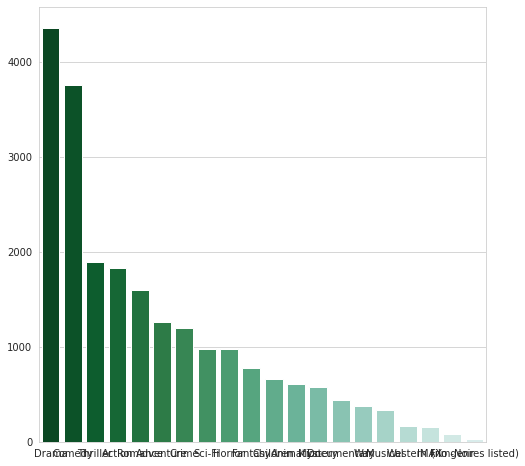

In [15]:
movies_by_genre = sum_movies_genres.sort_values(ascending=False)
plt.figure(figsize=(8,8))
sns.barplot(x=movies_by_genre.index,
            y=movies_by_genre.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(movies_by_genre) + 4))
plt.show()

In [33]:
rating = movies_rating.groupby("movieId")['rating'].mean()
movies_with_mean = movies.join(rating, on="movieId").rename(columns={'rating': 'rating'})
movies_with_mean.head(10)

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
5,6,Heat (1995),Action|Crime|Thriller,3.946078
6,7,Sabrina (1995),Comedy|Romance,3.185185
7,8,Tom and Huck (1995),Adventure|Children,2.875000
8,9,Sudden Death (1995),Action,3.125000
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.496212


3.9209302325581397


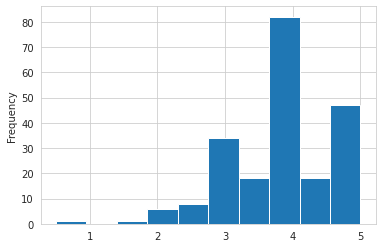

In [21]:
votes_movie1 = movies_rating.query("movieId==1")["rating"]
print(votes_movie1.mean())
votes_movie1.plot(kind='hist')

3.4318181818181817


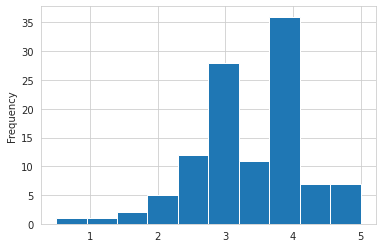

In [22]:
votes_movie2 = movies_rating.query("movieId==2")["rating"]
print(votes_movie2.mean())
votes_movie2.plot(kind='hist')

In [27]:
# City A
population = 1000
salary = 1100
 
mean = (salary * population) / population
mean

1100.0

In [30]:
# City B
population = 1000
salary1 = 1000000
salary999 = 100
 
mean = (salary1 * 1 + salary999 * 999) / 1000
mean

1099.9

In [34]:
movies_with_mean.sort_values("rating", ascending=False)[2450:2500]

,movieId,title,genres,rating
745,973,Meet John Doe (1941),Comedy|Drama,3.900000
6632,56251,Futurama: Bender's Big Score (2007),Animation|Comedy|Sci-Fi,3.900000
101,116,Anne Frank Remembered (1995),Documentary,3.900000
5719,27846,"Corporation, The (2003)",Documentary,3.900000
802,1050,Looking for Richard (1996),Documentary|Drama,3.900000
3983,5617,Secretary (2002),Comedy|Drama|Romance,3.900000
1323,1785,King of New York (1990),Crime|Thriller,3.900000
7103,70599,"Time Traveler's Wife, The (2009)",Drama|Romance|Sci-Fi,3.900000
5248,8607,Tokyo Godfathers (2003),Adventure|Animation|Drama,3.900000
4677,6985,"Passion of Joan of Arc, The (Passion de Jeanne...",Drama,3.900000


In [35]:
def plot_movie(id):
    rating_movie = movies_rating.query(f"movieId=={id}")['rating']
    rating_movie.plot(kind='hist')
    return rating_movie.describe()

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: rating, dtype: float64

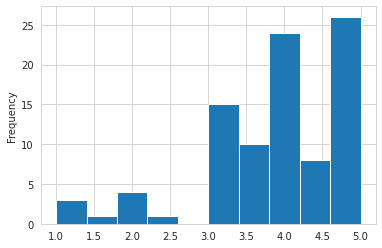

In [37]:
plot_movie(919)

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: rating, dtype: float64

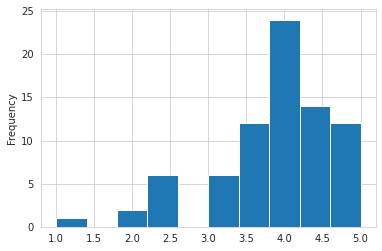

In [38]:
plot_movie(46578)

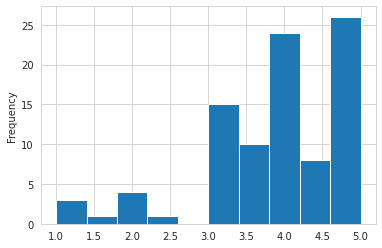

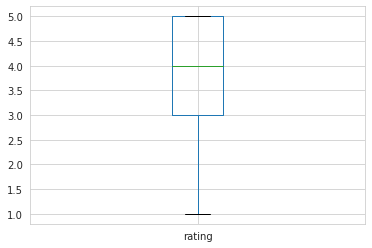

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: rating, dtype: float64

In [40]:
def plot_movie(id):
    rating_movie = movies_rating.query(f"movieId=={id}")['rating']
    rating_movie.plot(kind='hist')
    plt.show()
    print('\n')
    rating_movie.plot.box()
    plt.show()
    return rating_movie.describe()

plot_movie(919)

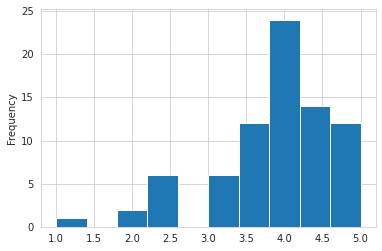

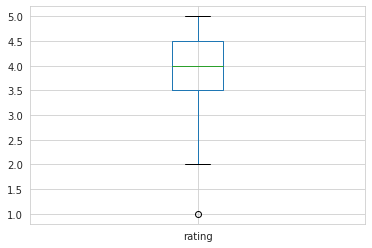

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: rating, dtype: float64

In [41]:
plot_movie(46578)

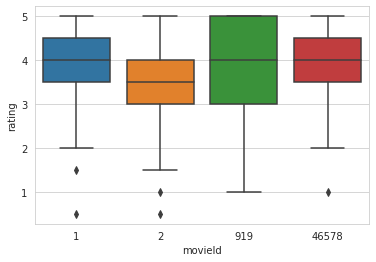

In [42]:
sns.boxplot(data = movies_rating.query("movieId in [1,2,919,46578]"), x ="movieId", y="rating")